In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [53]:
data_train=pd.read_csv("C:/Users/lenovo/Downloads/compresive_strength_concrete.csv")
data_test=pd.read_excel("C:/Users/lenovo/Desktop/Book1.xlsx")

In [54]:
data_train= data_train.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",'Fly Ash (component 3)(kg in a m^3 mixture)':"flyash",'Water  (component 4)(kg in a m^3 mixture)':"water",'Superplasticizer (component 5)(kg in a m^3 mixture)' :"plasticizer",'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg",'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [55]:
data_test= data_test.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"slag",'Fly Ash (component 3)(kg in a m^3 mixture)':"flyash",'Water  (component 4)(kg in a m^3 mixture)':"water",'Superplasticizer (component 5)(kg in a m^3 mixture)' :"plasticizer",'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg",'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [56]:
data_train

,cement,slag,flyash,water,plasticizer,coarse_agg,fine_agg,Age (day),compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [57]:
data_test

,cement,slag,flyash,water,plasticizer,coarse_agg,fine_agg,Age (day),compressive_strength
0,540,0,0,162,2.5,1050,676,28,NaN


In [58]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   slag                  1030 non-null   float64
 2   flyash                1030 non-null   float64
 3   water                 1030 non-null   float64
 4   plasticizer           1030 non-null   float64
 5   coarse_agg            1030 non-null   float64
 6   fine_agg              1030 non-null   float64
 7   Age (day)             1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [59]:
data_test.dtypes

cement                    int64
slag                      int64
flyash                    int64
water                     int64
plasticizer             float64
coarse_agg                int64
fine_agg                  int64
Age (day)                 int64
compressive_strength    float64
dtype: object

In [60]:
print(" the missing values are:\n",data_train.isnull().sum())

 the missing values are:
 cement                  0
slag                    0
flyash                  0
water                   0
plasticizer             0
coarse_agg              0
fine_agg                0
Age (day)               0
compressive_strength    0
dtype: int64


In [61]:
data_train.corr()

,cement,slag,flyash,water,plasticizer,coarse_agg,fine_agg,Age (day),compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
plasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_agg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_agg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


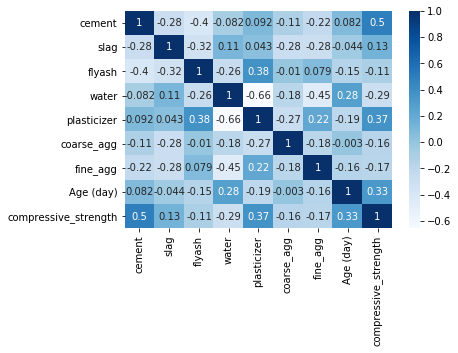

In [62]:
corr = data_train.corr() 
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

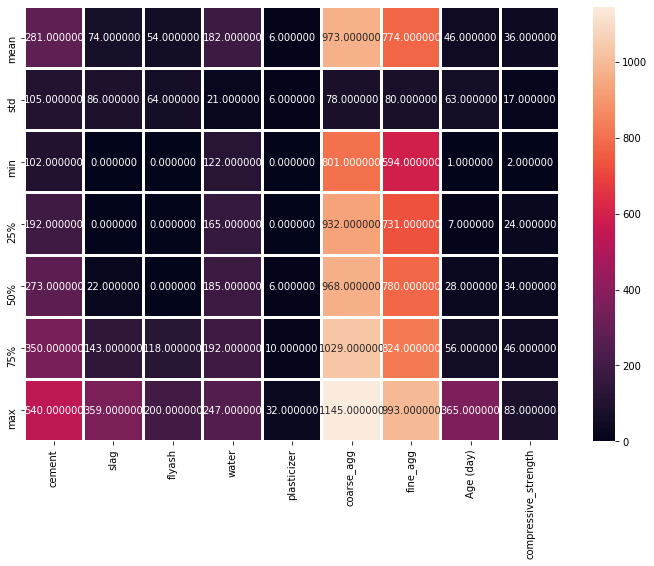

In [63]:
data_train.describe()
plt.figure(figsize=(12,8))
sns.heatmap(round(data_train.describe()[1:]),annot=True,linewidth=2,fmt='f')
plt.show()

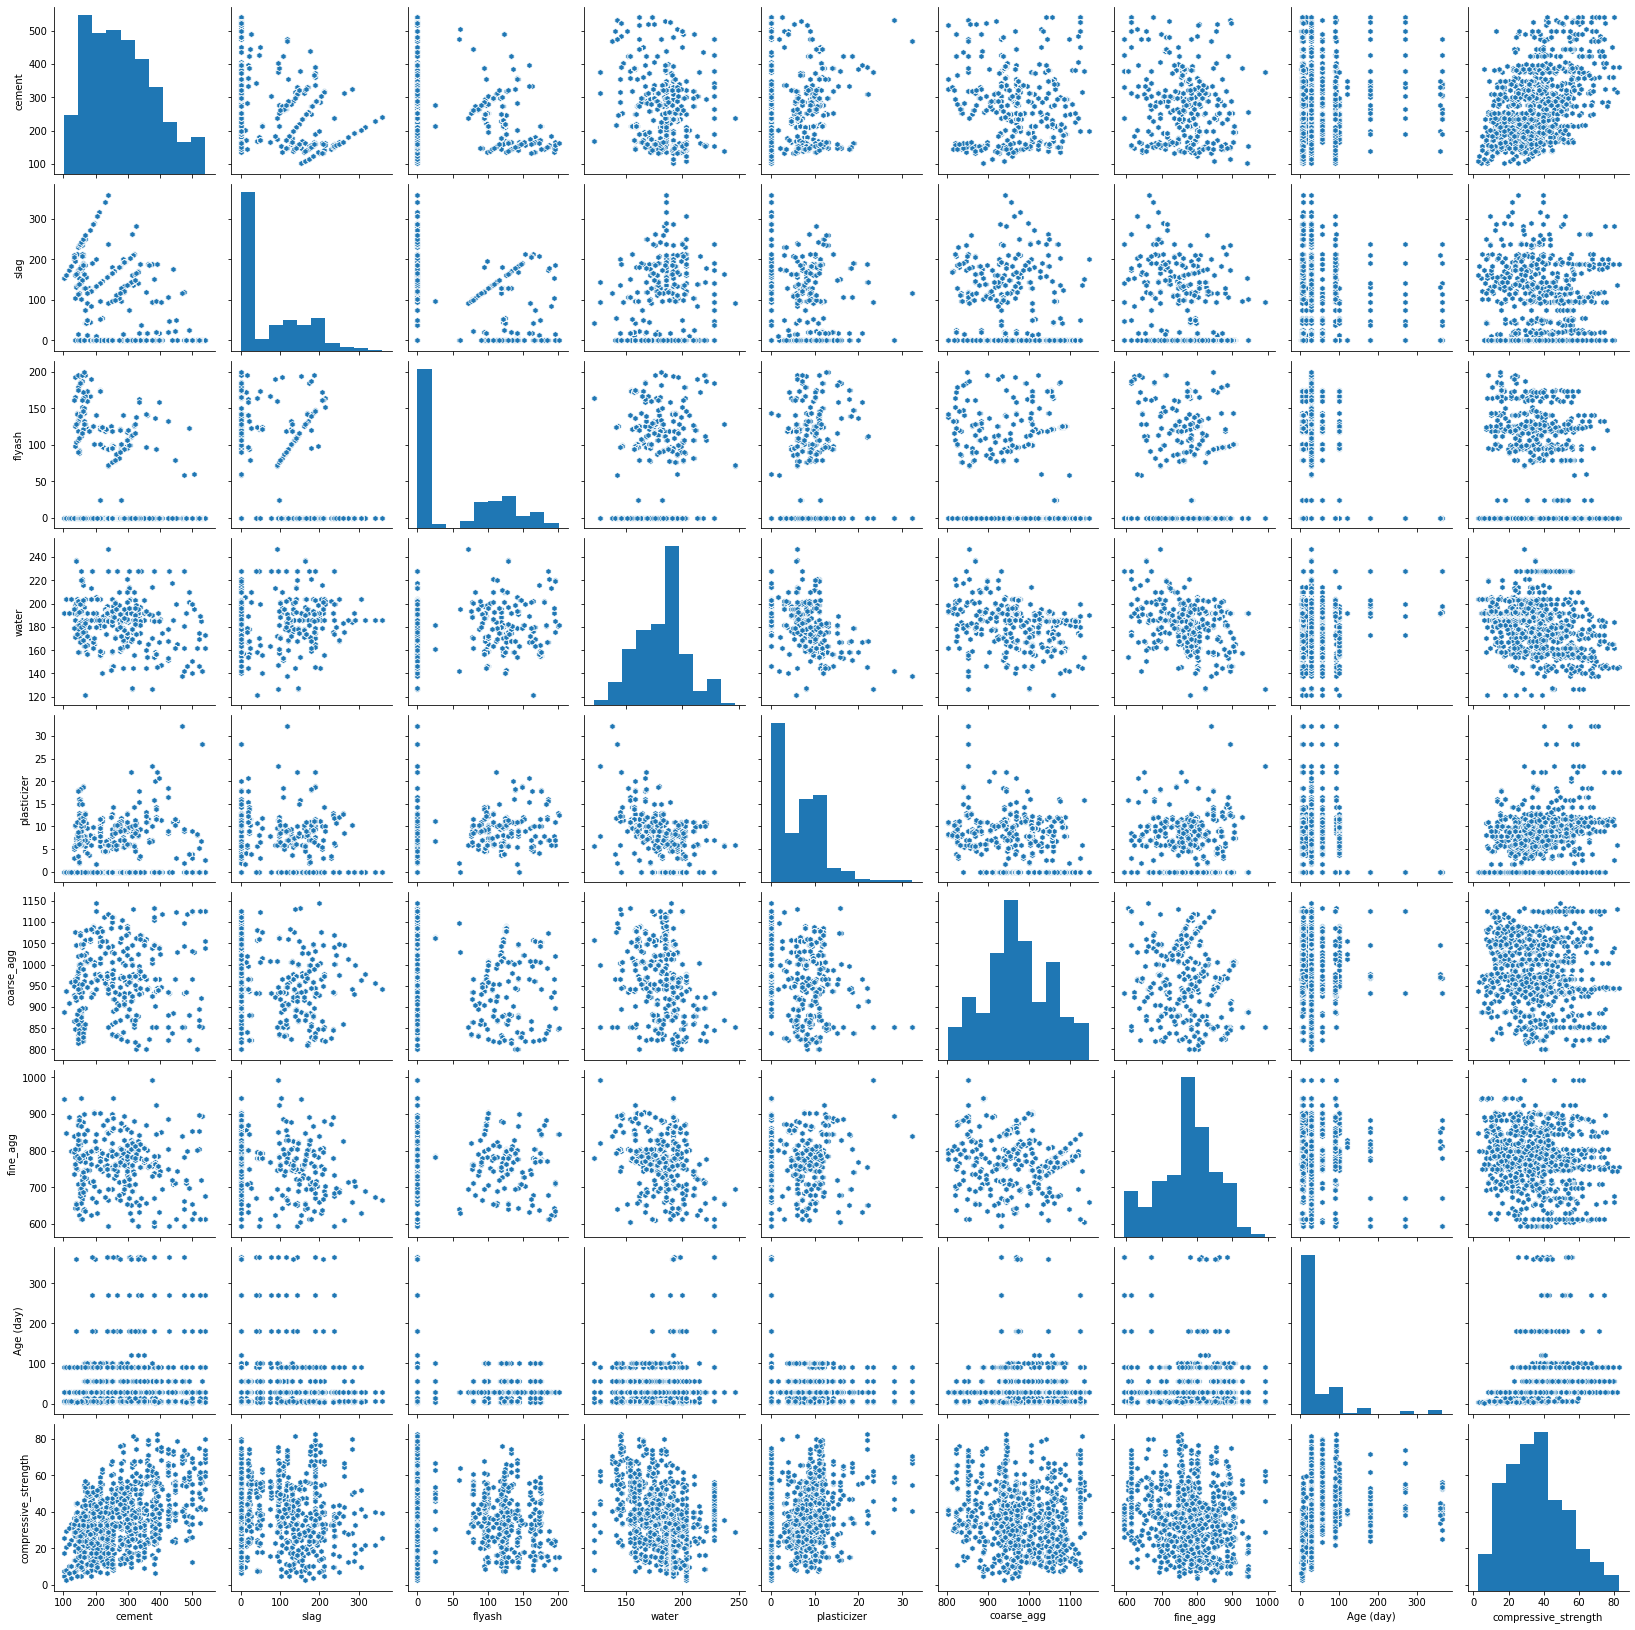

In [64]:
sns.pairplot(data_train,markers="h")
plt.show()

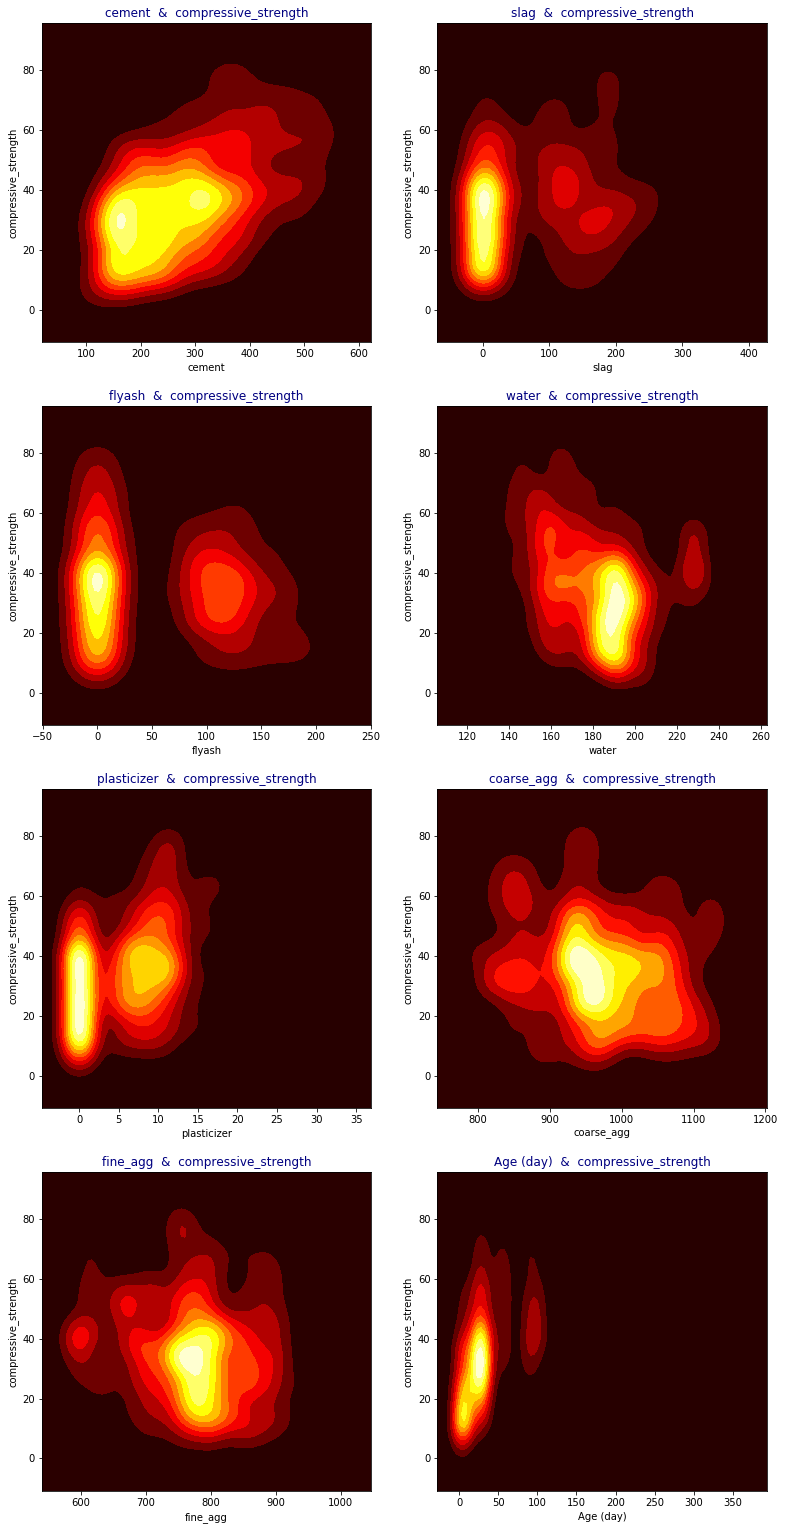

In [65]:
cols=[i for i in data_train.columns if i not in 'compressive_strength']
length=len(cols)
plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.kdeplot(data_train[i],
                data_train["compressive_strength"],
                cmap="hot",
                shade=True)
    plt.title(i+"  &  compressive_strength",color="navy")

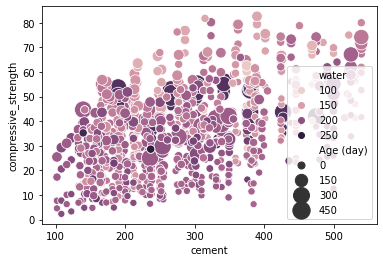

In [66]:
sns.scatterplot(y="compressive_strength",x="cement",hue="water", 
    size="Age (day)",data=data_train,sizes=(50,300))
plt.show()

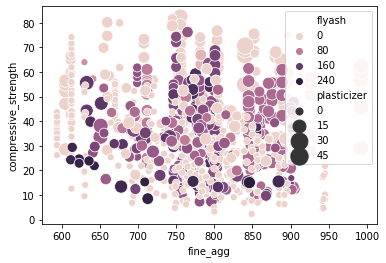

In [67]:
sns.scatterplot(y="compressive_strength",x="fine_agg",hue="flyash", 
    size="plasticizer",data=data_train,sizes=(50,300))
plt.show()

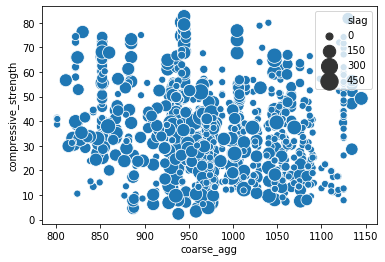

In [68]:
sns.scatterplot(y="compressive_strength",x="coarse_agg", 
    size="slag",data=data_train,sizes=(50,300))
plt.show()

In [69]:
X_train=data_train.drop("compressive_strength",axis=1)
X_test  = data_test.drop("compressive_strength", axis=1).copy()

In [70]:
Y_train = data_train["compressive_strength"]

In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr=LinearRegression()
lasso = Lasso()
ridge = Ridge()
lr.fit(X_train, Y_train) 
lasso.fit(X_train, Y_train) 
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
acc_lr=round(lr.score(X_train,Y_train)*100,2)
print("the accuracy of linear regression is :",acc_lr)
acc_lasso=round(lasso.score(X_train,Y_train)*100,2)
print("the accuracy of lasso regression is :",acc_lasso)
acc_ridge=round(ridge.score(X_train,Y_train)*100,2)
print("the accuracy of ridge regression is :",acc_ridge)

the accuracy of linear regression is : 61.55
the accuracy of lasso regression is : 61.53
the accuracy of ridge regression is : 61.55


In [73]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train, Y_train) 
acc_dtr=round(dtr.score(X_train,Y_train)*100,2)
print("the accuracy of decision tree regression is :",acc_dtr)

the accuracy of decision tree regression is : 99.61


In [74]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, Y_train) 
acc_rfr=round(rfr.score(X_train,Y_train)*100,2)
print("the accuracy of drandom tree regression is :",acc_rfr)

the accuracy of drandom tree regression is : 98.68


In [75]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr =XGBRegressor()
xgr.fit(X_train, Y_train) 
acc_xgb= round(xgr.score(X_train, Y_train) * 100, 2)
acc_xgb

99.48

In [76]:
# so the accuracy of decision tree is 99.61 we will use decision tree regression for prediction on test data
y_pred_dtr = dtr.predict(X_test)
print("the compressive strength of cocnrete for test data is", y_pred_dtr)

the compressive strength of cocnrete for test data is [61.89]
